In [2]:
import numpy as np 

# the applied stats module 
import applied_stats.mle as mle 
import applied_stats.continuous_distributions as st 

# About this module

This module is intended to explore object-oriented programming implementations of common statistical distributions. The actual source code is available on PyPI here: https://pypi.org/project/applied-stats/

Each distribution is created as its own class with the pdf, plotting, and probability calculations as separate methods that can then be called on the class object (as demonstrated below). 

Right now, there are continuous_distribution and MLE modules which are demonstrated below. 

## Normal distribution

Where X is a normal random variable: 

$X \sim N(\mu,\sigma^{2})\$

A random variable is normal if it has the following pdf: 

$
\begin{equation}
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{{-\frac{1}{2}}(\frac{x-\mu}{\sigma})^2} ,  \quad  -\infty < x < \infty
\end{equation}
$

Probabilities are calculated by the module, by default, as follows: 

$
\int_{-\infty}^{0} \frac{1}{\sqrt{2\pi\sigma^2}}e^{{-\frac{1}{2}}(\frac{x-\mu}{\sigma})^2} dx
$

Where the upper limit is the optional critical value argument. As shown in the second normal distribution example, this can be changed to calculate different probabilities but will always calculate the area the the left of the c.v.

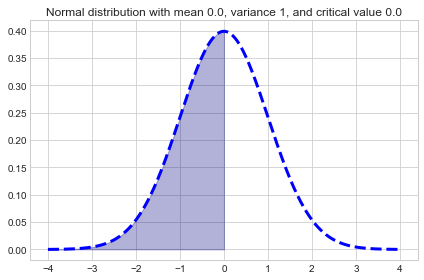

'P(X<crit_val) is 0.5 with an error estimate of 0.0'

In [3]:
#a standard normal r.v. (E(x)=0, Var(x)=1)
a = st.Norm_rv(0,1)
a.plot_pdf() 
a.probability_calc()

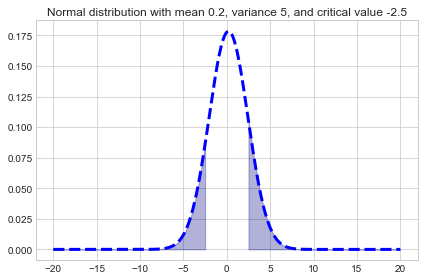

'P(X<crit_val) is 0.11362 with an error estimate of 0.0'

In [10]:
# mean = 0, variance = 7, and a critical value of -2.5
b = st.Norm_rv(.2,5,-2.5) 

#recently added the capability to plot two-tailed distributions. As of now this 
# will only plot and shade symmetric areas right and left of the crit values
b.plot_pdf(two_tail=True,cv_probability=True)
b.probability_calc()

## Chi-squared distribution 

Where X is a chi-squared random variable with r degrees of freedom: 

$ X \sim \chi^2 (r) $

A random variable is said to be chi-squared if it has the following pdf: 

$
\begin{align*}
f(x; r) \begin{cases}
      \dfrac{1}{\Gamma({\frac{r}{2}}) 2^{\frac{r}{2}}} x^{\frac{r}{2}-1} e^{-\frac{x}{2}}  & 0 \leq x < \infty \\
      0 & otherwise\\
\end{cases}\\
\end{align*}
$

With mean = $r$ and variance = $2r$ 

By default, the probability is calculated as:

$\int_{0}^{\infty} \dfrac{1}{\Gamma({\frac{r}{2}}) 2^{\frac{r}{2}}} x^{\frac{r}{2}-1} e^{-\frac{x}{2}} dx $ 

Though since this will return 1, it is more practical to specify a critical value

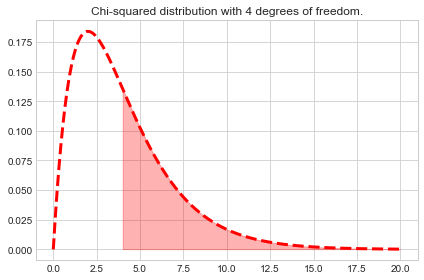

'P(X > df) is 0.40601 with an error estimate of 0.0'

In [14]:
q = st.ChiSq_rv(4)
q.plot_pdf()
q.probability_calc()

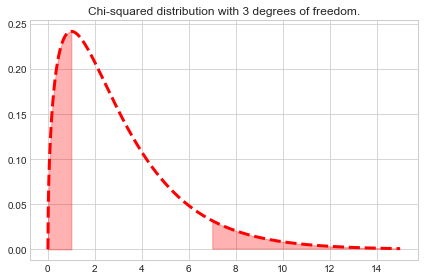

'P(X < left_critical_value) is 0.19875 and P(X > right_crit_value) is 0.0719. Total probability is 0.27065 with total error estimate 0'

In [24]:
z = st.ChiSq_rv(3)
z.plot_pdf(left_cv=1, right_cv=7, cv_probability=True, two_tail=True)
z.probability_calc()

## t-distribution

Where X has a t distribution with v degrees of freedom: 

$X \sim t(v)$ 

X is said to have a t-distribution if it has the following pdf: 

$f(x; v) = \frac {\Gamma{(\frac{v+1}{2})}} {\sqrt{\pi v} \Gamma{\frac{v}{2}} (1 + \frac{x^2}{v})^{\frac{v+1}{2}}}, \quad -\infty < x < \infty $

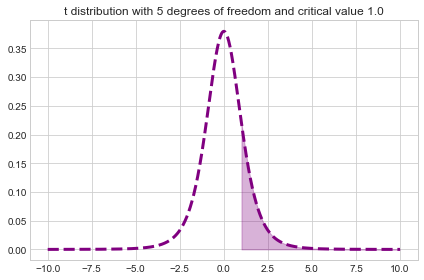

'P(X>crit_val) is 0.18161 with an error estimate of 0.0'

In [7]:
t = st.t_rv(5,1)
t.plot_pdf(cv_probability=True)
t.probability_calc()

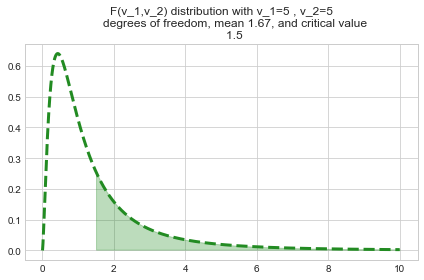

'P(X>crit_val) is 0.33361 with an error estimate of 0.0'

In [8]:
f = st.F_rv(5,5,1.5)
f.plot_pdf(cv_probability=True)
f.probability_calc()

# MLE Examples

In [47]:
sample_data = np.random.rand(100) * 10 

In [48]:
mu, variance = mle.normal(sample_data)
variance = int(round(variance,0)) # limitation to fix: variance needs to be integer currently 
print(mu, variance)

5.448299692053602 8


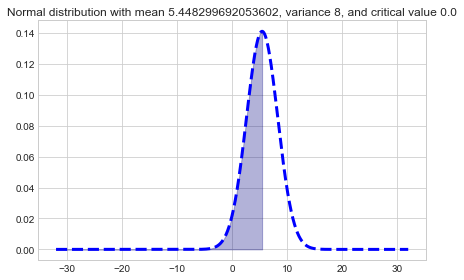

'P(X<crit_val) is 0.02704 with an error estimate of 0.0'

In [49]:
#a standard normal r.v. with mean and variance as estimated above 
x = st.Norm_rv(mu, variance)
x.plot_pdf() 
x.probability_calc() 